# 의사결정 트리 (Decision Tree)

- 지도학습 (Supervised Learning)의 알고리즘으로 분류(Classification) 또는 회귀(Regression) 분석 목적으로 사용
- 나무 구조 표현을 통해 분류와 예측을 수행하는 분석 방법
- 목표 변수 유형에 따른 의사결정 트리
    - 범주형 목표변수 : 분류 트리 (Classification Tree), 각각의 범주에 속하는 빈도에 기초해 분리 발생
    - 연속형 목표변수 : 회귀 트리 (Regression Tree), 평균과 표준편차에 기초해 분리 발생

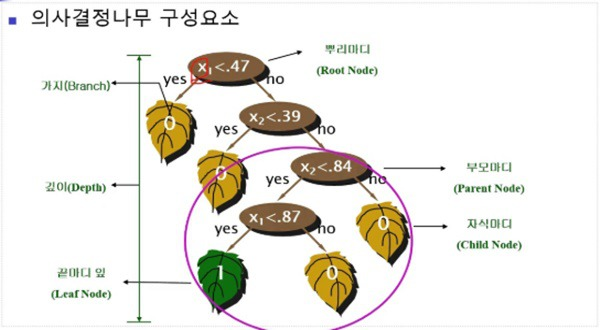

- 루트 노드 (Root Node) : 트리구조가 시작되는 노드, 전체 자료로 구성
- 부모 노드 (Parent Node) : 자식노드의 상위 노드
- 자식 노드 (Child Node) : 하나의 노드로부터 분리되어 나간 2개 이상의 노드들을 의미
- 끝 노드 (Terminal Node, Leaf Node) : 트리 줄기의 끝에 위치하고 있고 자식 노드가 없는 노드
- 가지 (Branch) : 뿌리 노드로부터 끝 노드까지 연결된 노드들
- 깊이 (Depth) : 뿌리 노드로 부터 끝 노드를 이루는 층의 수


## Decision Tree 분석과정

1. 성장 (Growing) : 분석의 목적에 따라 각 노드에서 적절한 최적의 분리기준을 찾아 트리를 성장시키는 과정, 적절한 정지규칙(Stopping Rule)을 통한 의사결정 트리 도출
2. 가지치기 (Pruning) : 오분류를 크게 할 위험이 높거나 부적절한 추론규칙을 가지는 불필요한 가지를 제거
3. 타당성 평가 : 이익 도표, 위험 도표, 또는 검증용 자료로 의사결정 트리 평가
4. 해석 및 예측 : 의사결정 트리를 해석하고 예측모형 결정

## 의사결정 트리 분리기준 (Split Criterion)

- 부모 노드로 부터 자식 노드들이 형성될 때, 생성된 자식 노드에 속하는 자료의 순수도(Purity)가 가장 크게 증가하도록 트리를 형성하며 진행
- 입력 변수를 이용해 목표변수의 분포를 얼마나 잘 구별하는 정도를 파악해 자식노드가 형성되는데, 목표 변수의 구별 정도를 불순도(Impurity)에 의해 측정

### 지니 지수 (Gini index)

- 데이터 집합의 불순도 측정
- 0~1 사이의 값을 가지며, 어떤 데이터 집합에 속한 개체(레코드)들이 같은 범주(클래스)로 구성되어 있으면 지니 지수는 최솟값인 0 을 갖고 해당 데이터 집합은 순수하다고 볼 수 있음
- 즉 지니 지수가 작을 수록 잘 분류된 것

### 엔트로피 지수 (Entropy index)

- 엔트로피는 주어진 데이터 집합의 혼잡도를 의미
- 주어진 데이터 집합에 서로 다른 범주(클래스)의 개체(레코드)들이 많이 섞여 있으면 엔트로피가 높고, 같은 범주의 개체들이 많이 있으면 엔트로피가 낮음
- 0~1 사이의 값을 가지며, 가장 혼잡도가 높은 상태는 1, 혼잡도가 가장 낮은 상태는 0임

### 정보 이득 (Information Gain)

- 상위 노드의 엔트로피 지수에서 하위 노드의 가중 평균한 엔트로피 지수를 뺀 것을 의미
- 즉 원래 상위 노드의 엔트로피를 구하고 어떤 속성을 선택한 후의 x 개의 하위 노드로 분리된 것에 대한 가중 평균한 엔트로피를 구한 값의 차를 의미 
- 정보 이득이 클 수록 분류하기 좋은 속성이라는 것을 의미

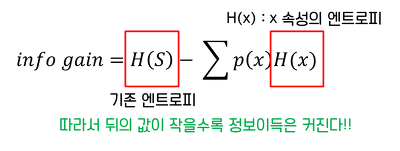

### 패키지 로드

In [2]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from IPython.display import Image

import pandas as pd
import numpy as np
import pydotplus
import os

/Users/eastone/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/Users/eastone/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [5]:
tennis_data = pd.read_csv('../data/PlayTennis.csv')
tennis_data

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


#### 데이터 전처리

문자형 변수들을 숫자로 바꿔주기 위해 replace 함수를 사용합니다

In [12]:
#데이터 전처리

tennis_data.Outlook = tennis_data.Outlook.replace('Sunny',0)
tennis_data.Outlook = tennis_data.Outlook.replace('Overcast',1)
tennis_data.Outlook = tennis_data.Outlook.replace('Rain',2)

tennis_data.Temperature = tennis_data.Temperature.replace('Hot',3)
tennis_data.Temperature = tennis_data.Temperature.replace('Mild',4)
tennis_data.Temperature = tennis_data.Temperature.replace('Cool',5)

tennis_data.Humidity= tennis_data.Humidity.replace('High',6)
tennis_data.Humidity= tennis_data.Humidity.replace('Normal',7)

tennis_data.Wind= tennis_data.Wind.replace('Weak',8)
tennis_data.Wind= tennis_data.Wind.replace('Strong',9)

tennis_data['Play Tennis']= tennis_data['Play Tennis'].replace('No',10)
tennis_data['Play Tennis']= tennis_data['Play Tennis'].replace('Yes',11)

tennis_data

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,0,3,6,8,10
1,0,3,6,9,10
2,1,3,6,8,11
3,2,4,6,8,11
4,2,5,7,8,11
5,2,5,7,9,10
6,1,5,7,9,11
7,0,4,6,8,10
8,0,5,7,8,11
9,2,4,7,8,11


In [13]:
# 속성과 클래스 분리

X = np.array(pd.DataFrame(tennis_data, columns = ['Outlook','Temperature','Humidity','Wind']))
y = np.array(pd.DataFrame(tennis_data, columns = ['Play Tennis']))

In [14]:
#Train, Test set 분리

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [15]:
#의사결정나무 모델생성
dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(X_train,y_train)


In [16]:
#예측값 저장

dt_prediction = dt_clf.predict(X_test)

#### 성능평가

In [17]:
print(confusion_matrix(y_test, dt_prediction))

[[0 1]
 [2 1]]


In [19]:
print(classification_report(y_test,dt_prediction))

              precision    recall  f1-score   support

          10       0.00      0.00      0.00         1
          11       0.50      0.33      0.40         3

   micro avg       0.25      0.25      0.25         4
   macro avg       0.25      0.17      0.20         4
weighted avg       0.38      0.25      0.30         4



#### 의사결정트리 그래프 표현

In [20]:
#컬럼명을 feature_names이라는 이름에 추출해줍니다.
feature_names = tennis_data.columns.tolist()
feature_names = feature_names[0:4]

In [21]:
#Yes, No 값을 표시하기 위해 타겟 네임을 지정해줍니다
target_name = np.array(['Play No', 'Play Yes'])

In [22]:
dt_dot_dat = tree.export_graphviz(dt_clf, out_file=None,
                                 feature_names= feature_names,
                                 class_names= target_name,
                                 filled= True, rounded= True,
                                 special_characters= True)

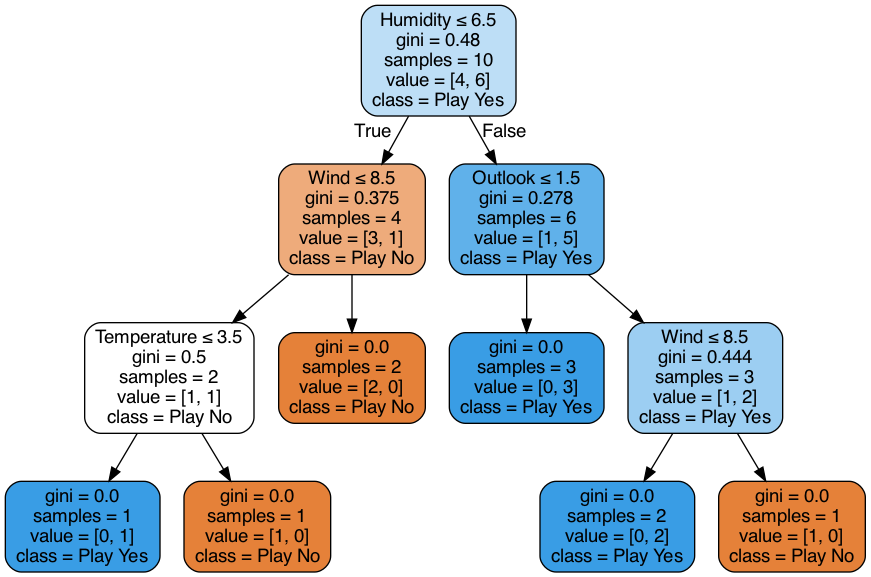

In [25]:
dt_graph = pydotplus.graph_from_dot_data(dt_dot_dat)
Image(dt_graph.create_png())